In [1]:
import pandas as pd
import numpy as np
import datascience
import re
from string import punctuation
from nltk.corpus import stopwords
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set()
sns.set_context("talk")


In [44]:
#read dailypay reviews into dataframes
dpapp = pd.read_csv("dailypayappstore.csv")
dpgoog = pd.read_csv("dailypaygoogle.csv")

In [45]:
dpappreviews = dpapp["review"]
dpappreviews

0      Not sure if it’s an app issue. But the service...
1      I helped out at an additional store last pay p...
2      The app has worked pretty well for me, but I w...
3      First and foremost, a lot of these issues are ...
4      At first...it would allow me to transfer money...
                             ...                        
159                                                  ...
160    Simple app to use I just hat that I have to si...
161    I never wrote a review in my life. But they mu...
162    Scheduled maintenance for 2 days 12/30-12/31. ...
163    It’s a scam. I was supposed to get paid 12/6/1...
Name: review, Length: 164, dtype: object

In [119]:
split_google_reviews = []
for review in dpgoog[dpgoog['polarity'] < 5]['content']:
    split_google_review = review.split()
    new_array = []
    for word in split_google_review:
        no_punct = ''.join([ch for ch in word if ch not in punctuation]) #remove punctuation
        no_digit = ''.join([ch for ch in no_punct if not ch.isdigit()])
        if no_punct != no_digit: #remove digits or words with digits
            continue
        lower = no_digit.lower() #lowercase words
        no_apostrophe = re.sub(r'’', "'", lower)
        stop = stopwords.words('english')
        if no_apostrophe not in stop:
            new_array.append(lower)
    split_google_reviews.append(new_array)
split_google_reviews[:1]

[['inaccurate',
  '',
  'inconsistent',
  'every',
  'day',
  'problem',
  'app',
  'take',
  'checksmisplace',
  'funds',
  '',
  'blame',
  'outdated',
  'algorithms',
  'use',
  'balance',
  'updates',
  'randomly',
  'throughout',
  'daysometimes',
  'balance',
  'wont',
  'update',
  'days',
  'concurrent',
  'offer',
  'certain',
  'companies',
  'free',
  'next',
  'day',
  'money',
  'transfers',
  'charge',
  'others',
  'fee',
  'regardless',
  'instant',
  'transfer',
  'next',
  'day',
  'app',
  'preys',
  'poor',
  '',
  'vulnerable',
  'avoid',
  'cost']]

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

def remove_digits(comment):
    return ''.join([ch for ch in comment if not ch.isdigit()])

no_digit_reviews = dpappreviews.apply(remove_digits)
countvec = CountVectorizer()
sparse_dtm = countvec.fit_transform(no_digit_reviews)

In [48]:
dtm = pd.DataFrame(sparse_dtm.toarray(), columns=countvec.get_feature_names())
dtm.head()

,able,about,absolutely,abuse,accept,access,accessing,according,account,accurate,...,written,wrong,wrote,yeah,year,yesterday,yet,you,your,zero
0,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,2,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,2,4,0
4,0,0,0,0,0,0,0,0,2,0,...,0,0,1,0,0,0,0,0,0,0


In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfvec = TfidfVectorizer()
sparse_tfidf = tfidfvec.fit_transform(no_digit_reviews)
sparse_tfidf

<164x1056 sparse matrix of type '<class 'numpy.float64'>'
	with 4674 stored elements in Compressed Sparse Row format>

In [50]:
tfidf = pd.DataFrame(sparse_tfidf.toarray(), columns=tfidfvec.get_feature_names())
tfidf.head()

,able,about,absolutely,abuse,accept,access,accessing,according,account,accurate,...,written,wrong,wrote,yeah,year,yesterday,yet,you,your,zero
0,0.088238,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.066070,0.0,...,0.0,0.104319,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.052330,0.0,0.0,0.082312,0.0,...,0.0,0.064982,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.048984,0.000000,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.080609,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.111085,0.257079,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.161985,0.0,...,0.0,0.000000,0.142408,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0


In [51]:
tfidf.max().sort_values(ascending=False).head(20)

ditto        1.000000
amazing      0.935435
love         0.920542
lifesaver    0.885079
ideal        0.855741
rip          0.810716
bogus        0.732467
broke        0.693930
day          0.668926
very         0.662886
charge       0.662715
create       0.625326
easy         0.606537
saving       0.601776
helps        0.596351
off          0.585439
you          0.584130
fee          0.583801
expensive    0.574732
fees         0.564500
dtype: float64

In [52]:
tfidf['rating_'] = dpapp["rating"]
tfidf.head()

,able,about,absolutely,abuse,accept,access,accessing,according,account,accurate,...,wrong,wrote,yeah,year,yesterday,yet,you,your,zero,rating_
0,0.088238,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.066070,0.0,...,0.104319,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,5
1,0.000000,0.0,0.0,0.0,0.0,0.052330,0.0,0.0,0.082312,0.0,...,0.064982,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,1
2,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.048984,0.000000,0.0,3
3,0.000000,0.0,0.0,0.0,0.0,0.080609,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.111085,0.257079,0.0,5
4,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.161985,0.0,...,0.000000,0.142408,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,5


In [53]:
one = tfidf[tfidf['rating_'] == 1]
two = tfidf[tfidf['rating_'] == 2]
three = tfidf[tfidf['rating_'] == 3]
four = tfidf[tfidf['rating_'] == 4]
five = tfidf[tfidf['rating_'] == 5]

In [54]:
one.max(numeric_only=True).sort_values(ascending=False)[1:].head(30)

bogus          0.732467
charge         0.662715
fee            0.583801
later          0.550624
verified       0.521528
concept        0.519617
application    0.519617
as             0.506846
lot            0.480525
turns          0.470052
trash          0.466608
tried          0.464103
re             0.452286
better         0.448482
whenever       0.434841
recent         0.434788
crashes        0.433884
went           0.432093
worth          0.429363
maintenance    0.427844
worthless      0.423356
never          0.422446
advertised     0.413110
than           0.413012
white          0.409858
begin          0.404695
forced         0.404391
free           0.404391
awful          0.404391
most           0.402218
dtype: float64

In [55]:
two.max(numeric_only=True).sort_values(ascending=False)[1:].head(30)

rip          0.810716
create       0.625326
off          0.585439
shouldn      0.536040
add          0.474481
automatic    0.471244
charged      0.469679
own          0.467396
let          0.452203
won          0.442207
major        0.435944
card         0.430778
doesn        0.424885
other        0.424885
hard         0.411976
such         0.410898
should       0.404663
sad          0.386051
very         0.378826
login        0.375598
using        0.366631
put          0.364427
needs        0.362177
account      0.355645
from         0.351743
password     0.349651
why          0.347808
work         0.330109
screen       0.326335
checked      0.301511
dtype: float64

In [56]:
three.max(numeric_only=True).sort_values(ascending=False)[1:].head(30)

fees           0.564500
great          0.410865
like           0.396901
just           0.384336
log            0.376989
don            0.362448
ruined         0.336190
completely     0.336190
doing          0.336190
now            0.335805
stop           0.327652
network        0.327652
failure        0.327652
used           0.320383
cash           0.320052
update         0.315797
tell           0.311007
it             0.303523
connect        0.303108
aggravating    0.298857
logo           0.298857
crap           0.298857
been           0.297812
anyone         0.293139
times          0.288666
frustrating    0.285694
multiple       0.284684
understand     0.279279
give           0.279175
somethings     0.279175
dtype: float64

In [57]:
four.max(numeric_only=True).sort_values(ascending=False)[1:].head(30)

expensive      0.574732
out            0.546196
too            0.501134
logs           0.459708
close          0.459708
fee            0.458081
team           0.447393
members        0.447393
little         0.428055
password       0.411104
transfer       0.403842
into           0.396415
under          0.395990
bit            0.373239
hassle         0.365229
screen         0.346820
remember       0.337870
good           0.337426
won            0.337426
because        0.337426
typing         0.318459
makes          0.318459
feature        0.318459
work           0.317640
passwords      0.311013
keeping        0.310818
maintenance    0.309109
add            0.303402
deactivated    0.298439
ming           0.298439
dtype: float64

In [58]:
five.max(numeric_only=True).sort_values(ascending=False)[1:].head(30)

ditto            1.000000
amazing          0.935435
love             0.920542
lifesaver        0.885079
ideal            0.855741
broke            0.693930
day              0.668926
very             0.662886
easy             0.606537
saving           0.601776
helps            0.596351
you              0.584130
sunday           0.547900
thank            0.524715
how              0.521319
great            0.517405
tremendously     0.514815
any              0.514420
convent          0.506647
bills            0.500476
life             0.499906
next             0.494022
helpful          0.490357
paid             0.486131
consistent       0.463747
quickly          0.463747
ordered          0.462973
food             0.462973
see              0.457658
opportunities    0.451758
dtype: float64

In [59]:
#POLARITY ANALYSIS
dist = dpgoog.groupby("score").count().rename(columns = {"Unnamed: 0" : "Count"})[["Count"]]
dist

,Count
score,
1,337
2,50
3,54
4,61
5,486


In [60]:
save_count = 0
loan_count = 0
indexes = []
reviews = dpgoog["content"]
for i in range(len(reviews)):
    if reviews[i].count("save") > 0 or reviews[i].count("loan") > 0:
        indexes.append(i)
    save_count += reviews[i].count("save")
    loan_count += reviews[i].count("loan")
save_count, loan_count

(19, 15)

In [61]:
sent = pd.read_csv("vader_lexicon.txt", sep='\t', header = None, index_col = 0, usecols = [0,1], names = ["Word", "polarity"])
sent.head()

,polarity
Word,
$:,-1.5
%),-0.4
%-),-1.5
&-:,-0.4
&:,-0.7


In [62]:
dpgoog["content"] = [text.lower() for text in dpgoog["content"]]
dpgoog["content"]

0      very inaccurate & inconsistent. every day ther...
1      i enjoy the daily pay, but i feel it's a bit e...
2      it won't let me in it keeps booting me out! sa...
3      terrible. .i got like 5 punchouts, then they m...
4      app works completely but this is one my 3rd re...
                             ...                        
983                                                 good
984                                              awesome
985                                                 good
986                                              awesome
987                                               👌👍🙌👏💪✌
Name: content, Length: 988, dtype: object

In [63]:
punct_re = r'[^\w\s]'
dpgoog['no_punc'] = dpgoog["content"].str.replace(punct_re, " ")
dpgoog['no_punc']

0      very inaccurate   inconsistent  every day ther...
1      i enjoy the daily pay  but i feel it s a bit e...
2      it won t let me in it keeps booting me out  sa...
3      terrible   i got like 5 punchouts  then they m...
4      app works completely but this is one my 3rd re...
                             ...                        
983                                                 good
984                                              awesome
985                                                 good
986                                              awesome
987                                                     
Name: no_punc, Length: 988, dtype: object

In [64]:
tidy_format = dpgoog["no_punc"].str.split(expand = True).stack().reset_index(level = 1).rename(columns = {"level_1":"num", 0: "word"})
tidy_format

,num,word
0,0,very
0,1,inaccurate
0,2,inconsistent
0,3,every
0,4,day
...,...,...
982,0,useless
983,0,good
984,0,awesome
985,0,good


In [65]:
dpgoog['polarity'] = tidy_format.merge(sent,how = "left", left_on = tidy_format["word"], right_index = True).reset_index().groupby("index").agg(sum)["polarity"]
dpgoog

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,no_punc,polarity
0,0,gp:AOqpTOFXX4vWMhOSMKjmoK_7xTUGl8kdp-D0rsVqKdn...,Unknown Player,https://play-lh.googleusercontent.com/-_GQJPDU...,very inaccurate & inconsistent. every day ther...,1,101,2.8.0,2020-11-06 16:43:17,NaN,NaN,very inaccurate inconsistent every day ther...,-3.9
1,1,gp:AOqpTOG5iMcAspEgj-NyGQkSPDSjtXLIEva5fLzSaNE...,Robert Mitchael,https://play-lh.googleusercontent.com/-eaToFyb...,"i enjoy the daily pay, but i feel it's a bit e...",4,13,2.8.0,2020-11-27 19:39:06,NaN,NaN,i enjoy the daily pay but i feel it s a bit e...,-2.1
2,2,gp:AOqpTOHXxoqGz0J6j4Q650mf0JT_W1fG7bOf_5OmXlo...,Carolynn Soto,https://play-lh.googleusercontent.com/-GYIU-tv...,it won't let me in it keeps booting me out! sa...,1,57,2.8.0,2020-11-07 07:16:10,NaN,NaN,it won t let me in it keeps booting me out sa...,-0.4
3,3,gp:AOqpTOHCH9tvB_HL03cs2jG6KZANbHlzSLzH2UYwCwS...,Ivory Sallette,https://play-lh.googleusercontent.com/a-/AOh14...,"terrible. .i got like 5 punchouts, then they m...",1,21,2.8.0,2020-11-06 04:23:39,"Hi Ivory, I'm am deeply sorry to hear about th...",2020-11-06 08:30:09,terrible i got like 5 punchouts then they m...,-0.6
4,4,gp:AOqpTOEeHlZnYllAr5C9YcBYxGfetBrytzL2bLlOjA7...,Alisha Stubblefield,https://play-lh.googleusercontent.com/-wH7xWC4...,app works completely but this is one my 3rd re...,3,10,2.8.0,2020-11-07 20:48:57,NaN,NaN,app works completely but this is one my 3rd re...,-1.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,983,gp:AOqpTOGy7TuNvffkpHhwwBKnWhQYICqMxJAkFT7HGkZ...,oscar falgout,https://play-lh.googleusercontent.com/-pLL1fSR...,good,5,0,NaN,2020-10-24 19:45:26,NaN,NaN,good,1.9
984,984,gp:AOqpTOFNoYPcsVBiXpKvPQ4NG25dS9YSox4v--rN2Ei...,Meika N,https://play-lh.googleusercontent.com/a-/AOh14...,awesome,5,0,NaN,2020-09-09 18:40:02,NaN,NaN,awesome,3.1
985,985,gp:AOqpTOFP1jb8yEPw6JD2np2GMyI6ngWhALX-G5yTf8-...,Tammy McCombs,https://play-lh.googleusercontent.com/-jJqsDYk...,good,5,0,NaN,2020-03-16 14:51:33,NaN,NaN,good,1.9
986,986,gp:AOqpTOHvjc3Tx3Ja1Zv87f6spjLxiVXngP8Y5woDLaD...,Nico Garcia,https://play-lh.googleusercontent.com/-7W7tfJl...,awesome,5,0,NaN,2020-03-08 09:38:31,NaN,NaN,awesome,3.1


In [66]:
polar = dpgoog.iloc[indexes][["content","score", "polarity"]]
polar.sort_values("polarity", ascending = False)
dpgoog.shape

(988, 13)

save 23
bills 23
payday 46


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. P

email        18
new          18
earnings     17
told         17
helpful      17
issue        17
go           17
worst        17
bills        17
issues       17
saying       16
fine         16
direct       16
fee          16
support      16
life         16
updates      15
better       15
fees         15
available    15
horrible     15
phone        15
times        15
supposed     15
best         15
website      15
first        15
made         15
right        14
something    14
thank        14
called       14
want         14
thanks       14
comes        14
simple       14
alot         14
sucks        14
far          14
say          14
nice         13
find         13
takes        13
instant      13
half         13
said         13
come         13
makes        13
month        13
havent       13
dtype: int64

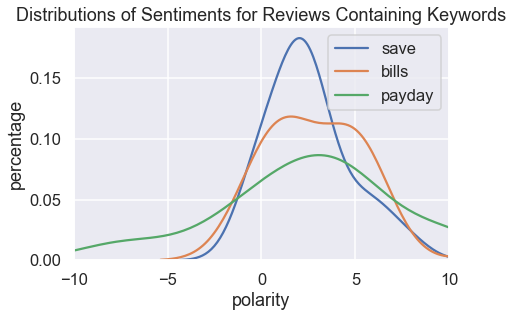

In [147]:
def polarity_reviews_by_word(word):
    dfWord = dpgoog[dpgoog["no_punc"].str.contains(word)]
    print(word, len(dfWord))
    sns.distplot(dfWord["polarity"], label = word, hist = False)



# save = dpgoog[dpgoog["no_punc"].str.contains("save")]
# loan = dpgoog[dpgoog["no_punc"].str.contains("loan")]
# glitch = dpgoog[dpgoog["no_punc"].str.contains("glitch")]
# # love = dpgoog[dpgoog["no_punc"].str.contains("love")]

# plt.figure(figsize = (10, 7))
# sns.distplot(save["polarity"], label = "save", hist = False)
# sns.distplot(loan["polarity"], label = "loan", hist = False)
# sns.distplot(glitch["polarity"], label = "glitch",  hist = False)
# # sns.distplot(love["polarity"], label = "love",  hist = False)




polarity_reviews_by_word('save')
polarity_reviews_by_word('bills')
polarity_reviews_by_word('payday')











plt.xlim(-10, 10)
plt.title("Distributions of Sentiments for Reviews Containing Keywords")
plt.legend(loc = "upper right")
plt.ylabel("percentage")


dpgoog_sorted_reviews = dpgoog.sort_values('polarity', ascending = False)['content']

# for review in dpgoog_sorted_reviews:
#     for word in review:
#         word_list.append(word)
# word_list = pd.Series(word_list)
# word_list.value_counts()

word_list = []
for review in split_google_reviews:
    for word in review:
        word_list.append(word)
        
pd.Series(word_list).value_counts()[100:150]